# Hello Decision Tree Classifier

In [2]:
# Prerequisites
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print("Python Version: ", sys.version)
print("Numpy Version: ", np.__version__)
np.set_printoptions(precision=3, suppress=True)

Python Version:  3.12.7 (tags/v3.12.7:0b05ead, Oct  1 2024, 03:06:41) [MSC v.1941 64 bit (AMD64)]
Numpy Version:  2.2.2


### Train a Decision Tree Classifier on Iris Dataset

Get data

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

ds_iris = load_iris(as_frame=True)

print(ds_iris.feature_names)
print(ds_iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


Get features and targets

In [4]:
X = ds_iris.data[["petal length (cm)", "petal width (cm)"]].values
y = ds_iris.target

Train Classifier

In [5]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

### Visualize Tree

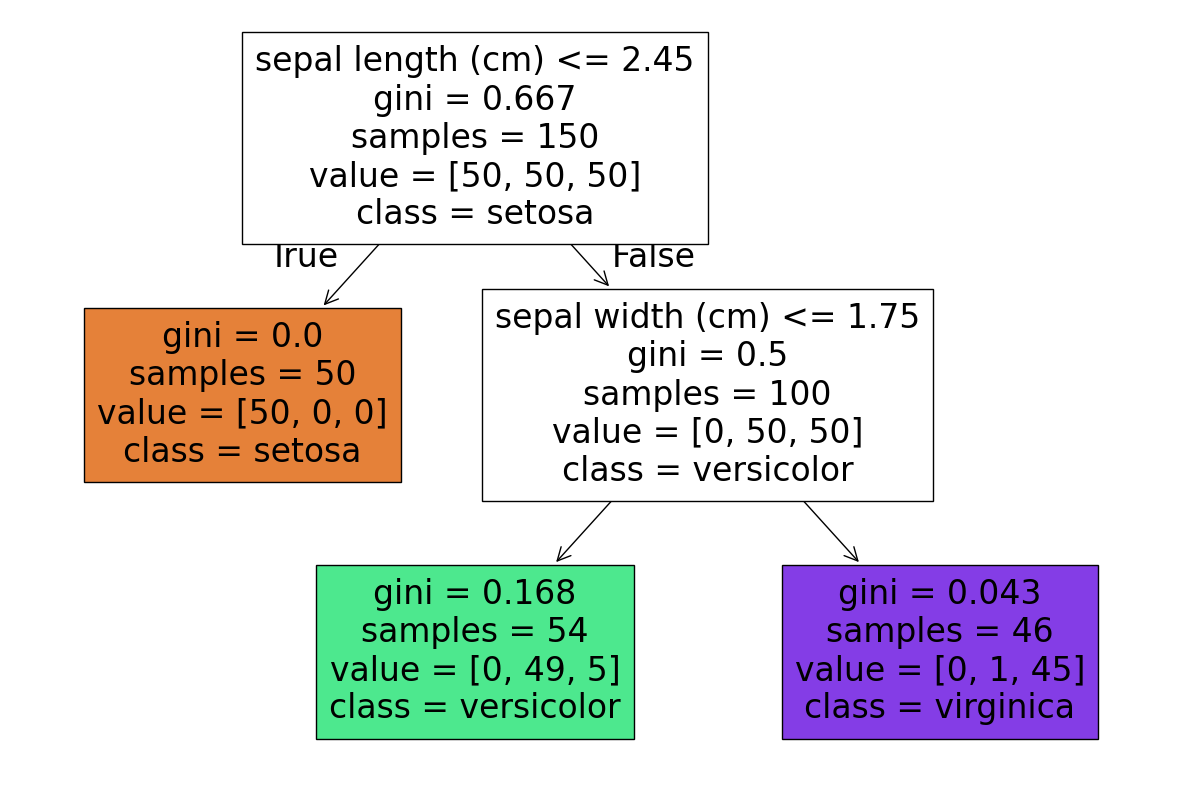

In [6]:
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(tree_clf, filled=True, feature_names=ds_iris.feature_names, class_names=ds_iris.target_names)
plt.show()

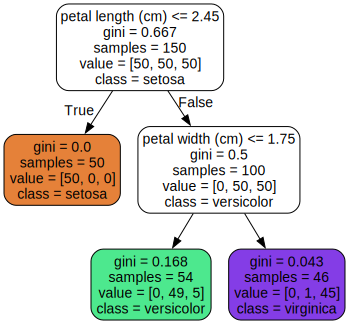

In [7]:
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(tree_clf, out_file="images/tree_classifier.dot",
                feature_names = ["petal length (cm)", "petal width (cm)"],
                class_names = ds_iris.target_names,
                rounded=True, filled=True)

Source.from_file("images/tree_classifier.dot")

In [8]:
print(tree_clf.tree_)

### Estimate Class Probabilities

In [7]:
# Check class probabilities for petal length = 5.0 cm, petal width = 1.5 cm
probs = tree_clf.predict_proba([[5, 1.5]]).round(3)
print(f"Probabilities, setosa = {probs[0][0]}, versicolor = = {probs[0][1]}, virginica = = {probs[0][2]}")

Probabilities, setosa = 0.0, versicolor = = 0.907, virginica = = 0.093


In [8]:
# Predict
pred = tree_clf.predict([[5, 1.5]])
print("Prediction, class = ", pred)

Prediction, class =  [1]


### Regularization

Using the moons dataset

In [9]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=150, noise=0.2, random_state=42)


Create Decisions Trees with and without regularization

In [10]:
tree_clf_A = DecisionTreeClassifier(random_state=42)   # No Regularization
tree_clf_B = DecisionTreeClassifier(random_state=42, min_samples_leaf=4)  # With Regularization

tree_clf_A.fit(X, y)
tree_clf_B.fit(X, y)

DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

Evaluate Accuracy with Test data

In [11]:
X_test, y_test = make_moons(n_samples=1000, noise=0.2, random_state=73)

accy_A = tree_clf_A.score(X_test, y_test)
accy_B = tree_clf_B.score(X_test, y_test)

print("Decision Tree w/o regularization accuracy: ", accy_A)
print("Decision Tree w/ regularization accuracy: ", accy_B)

Decision Tree w/o regularization accuracy:  0.911
Decision Tree w/ regularization accuracy:  0.924
